In [1]:
import warnings
warnings.filterwarnings('ignore')

from dropout_bayesian import dataset, Current
# 데이터 불러오기
df = dataset()
# current 클래스 생성
current = Current(df)

In [2]:
# index는 시간 단위 timestamp
# 역률평균, R S T 상역률로 역률평균을 예측
df.describe()

,역률평균,R상역률,S상역률,T상역률,LABEL_NAME
count,720.000000,720.000000,720.000000,720.000000,720.0
mean,0.949095,0.943734,0.948002,0.949588,0.0
std,0.006147,0.006513,0.006241,0.007392,0.0
min,0.926559,0.917448,0.925911,0.924349,0.0
25%,0.945136,0.939909,0.944580,0.944711,0.0
50%,0.949735,0.943229,0.946940,0.952344,0.0
75%,0.952257,0.947282,0.951318,0.955013,0.0
max,0.964498,0.960808,0.964844,0.962175,0.0


Epoch 1/150
2/2 [==============================] - 20s 3s/step - loss: 4.2324 - val_loss: 1.8097
Epoch 2/150
2/2 [==============================] - 2s 956ms/step - loss: 2.0260 - val_loss: 2.4812
Epoch 3/150
2/2 [==============================] - 2s 957ms/step - loss: 2.3712 - val_loss: 2.0162
Epoch 4/150
2/2 [==============================] - 2s 980ms/step - loss: 1.8175 - val_loss: 1.5004
Epoch 5/150
2/2 [==============================] - 2s 1s/step - loss: 1.4533 - val_loss: 0.6528
Epoch 6/150
2/2 [==============================] - 2s 1s/step - loss: 0.5590 - val_loss: 0.7241
Epoch 7/150
2/2 [==============================] - 2s 960ms/step - loss: 0.7097 - val_loss: 0.3329
Epoch 8/150
2/2 [==============================] - 2s 950ms/step - loss: 0.2684 - val_loss: 0.2368
Epoch 9/150
2/2 [==============================] - 2s 1s/step - loss: 0.2501 - val_loss: 0.0020
Epoch 10/150
2/2 [==============================] - 2s 2s/step - loss: -0.0710 - val_loss: -0.0415
Epoch 11/150
2/2 [===

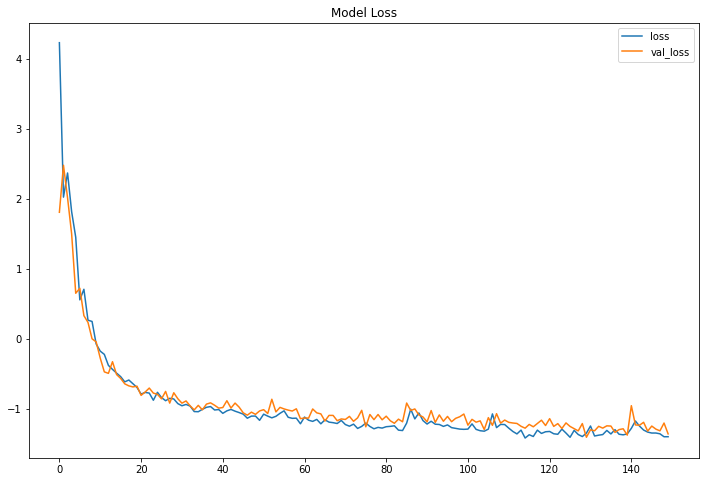

100%|██████████| 20/20 [00:18<00:00,  1.08it/s]


rmse: 0.11485079675912857
r2: 0.42466740345422294
For Uncertainty model, 0.9341317365269461 are in 99% confidence interval


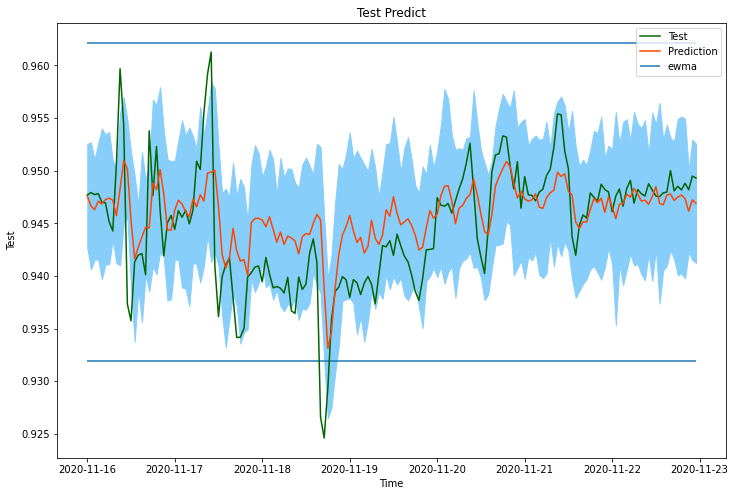

In [3]:
# Transformer LSTM 모델로 예측
# - 양방향 LSTM 2개와 FF layer 쌓은 트랜스포머 구조
# - key_dim : multihead attention 입력 차원
# - num_head : 병렬을 얼마나 할 것인지
# - ff_dim : FF 신경망 units
# - num_blocks : 트랜스포머 블록 층 (2개 이상이면 loss 크게 증가해서 1개로 한다)
model = current.Transfomer_LSTM(key_dim = 128, num_heads=2, ff_dim=128, num_blocks=1)

# 150번 반복, Adam optimizer
model = current.fit(model=model, epochs = 150, batch_size = 256, show_loss = True)

# Monte Carlo 샘플링 20번, 99% 신뢰구간 추정
TransformerLSTM_predict = current.predict_ci(model=model, n_sample = 20, ci=2.58, show= True)

In [ ]:
# 수평선은 지수평활법을 이용해 구한 6시그마 값
# 푸른 범위가 모델의 추정된 99% 신뢰구간 